In [270]:
import numpy as np
import scipy as sc
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

Exercise 0 (Setting the Random State):

In [271]:
rs = min(328964, 328830)
np.random.seed(rs) # you have to call in every cell where you use a function that requires a random state

Exercise 1 (Loading and Preparing the Data):

In [272]:
np.random.seed(rs)
#.1 (store in the variable df tot the df obtained from the csv file)
df_tot = pd.read_csv("cla4lsp_customers.csv", sep='\t', parse_dates=['Dt_Customer'], date_format='%d-%m-%Y')
#.2
workdf = df_tot.sample(frac=2/3, random_state=rs)
#.3
workdf.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
labels = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
          'Response', 'Complain', 'Recency']
features = list(workdf.drop(labels, axis=1).columns)
print("labels: ",labels)
print("features: ",features)
#.4
habits = features[7:16]
removed = np.random.choice(habits, 1)
workdf.drop(removed, axis=1, inplace=True)
features.remove(removed)
print("feature column removed: ",str(removed))
#.5
print("Colums with missing values: ",workdf.columns[workdf.isna().any()].tolist())
d = workdf.shape
workdf.dropna(axis=0, inplace=True)
print("Shape before missing values cleaning :", d, "and after: ",workdf.shape)

labels:  ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency']
features:  ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
feature column removed:  ['MntSweetProducts']
Colums with missing values:  ['Income']
Shape before missing values cleaning : (1493, 25) and after:  (1478, 25)


We chose to eliminate these columns because their meaning is not specified, so their informative contribution in phases of PCA are not clear.

From a quick check, we observed that the column with missing values cannot have a default value that is easy to replace. And since there are only fifteen of them (they do not constitute a pleasant portion of the data ), we decided to delete them.

2. Exercise 2 (Encoding of Categorical Data) \
Here we have four categorical features: Education, Marital_Status, Year_Birth and Dt_Customer; for the first two, since there are not too many possible values, we can use one-hot encoding by means of the pd.get_dummies() function, whereas for the last two, which have a lot of possible values, we use label encoding.

In [273]:
from sklearn.preprocessing import LabelEncoder

Xworkdf = pd.get_dummies(data=workdf[features], columns=['Education', 'Marital_Status'], drop_first=True)
new_cols = list(Xworkdf.columns[~Xworkdf.columns.isin(workdf.columns)])

years = Xworkdf['Year_Birth']
dates = Xworkdf['Dt_Customer']
le = LabelEncoder()
enc_years = le.fit_transform(years)
enc_dates = le.fit_transform(dates)
Xworkdf['Year_Birth'] = enc_years
Xworkdf['Dt_Customer'] = enc_dates


We adopted One-Hot coding for the features Education and Marital_Status because for PCA it works only with numeric features. We chose this type of coding because no intrinsic sorting can be set for these nominal categories, Xworkdf = pd.get_dummies(data=workdf[features], columns=['Education', 'Marital_Status'], drop_first=True) performs one-hot encoding of the 'Education' and 'Marital_Status' columns in the workdf DataFrame, creating new binary columns representing the different categories within those columns, with the first column being dropped to avoid multicollinearity. Instead for Year Birth and Dt_Customer is possible to set a sort so we applied a Label Encoding.

 Exercise 3 (Preprocessing and full-PCA)

In [274]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
mm = MinMaxScaler()

std_features = std.fit_transform(Xworkdf.values)
Xworkdf_std = pd.DataFrame(std_features, index=Xworkdf.index, columns=Xworkdf.columns)

mm_features = mm.fit_transform(Xworkdf.values)
Xworkdf_mm = pd.DataFrame(mm_features, index=Xworkdf.index, columns=Xworkdf.columns)

var_original = Xworkdf.var(axis='index')

In [275]:
var_std = Xworkdf_std.var(axis='index')
change_std = ((var_std - var_original) / var_original) * 100
print("\nPercentage Change in Variance with StandardScaler:")
print(change_std)


Percentage Change in Variance with StandardScaler:
Year_Birth                   -99.271364
Income                      -100.000000
Kidhome                      250.957207
Teenhome                     235.088785
Dt_Customer                  -99.996700
MntWines                     -99.999146
MntFruits                    -99.935812
MntMeatProducts              -99.997964
MntFishProducts              -99.965114
MntGoldProds                 -99.963312
NumWebPurchases              -86.669732
NumCatalogPurchases          -88.409549
NumStorePurchases            -90.586112
NumWebVisitsMonth            -83.186309
Education_Basic             3792.453805
Education_Graduation         300.422330
Education_Master             602.641398
Education_PhD                466.927229
Marital_Status_Alone       49266.870056
Marital_Status_Divorced      977.560242
Marital_Status_Married       319.672597
Marital_Status_Single        499.071426
Marital_Status_Together      429.063977
Marital_Status_Widow        

In [276]:
var_mm = Xworkdf_mm.var(axis='index')
change_mm = ((var_mm - var_original) / var_original) * 100
print("\nPercentage Change in Variance with MinMaxScaler:")
print(change_mm)


Percentage Change in Variance with MinMaxScaler:
Year_Birth                 -99.968112
Income                    -100.000000
Kidhome                    -75.000000
Teenhome                   -75.000000
Dt_Customer                -99.999719
MntWines                   -99.999955
MntFruits                  -99.997475
MntMeatProducts            -99.999966
MntFishProducts            -99.998498
MntGoldProds               -99.999030
NumWebPurchases            -99.840000
NumCatalogPurchases        -99.872449
NumStorePurchases          -99.408284
NumWebVisitsMonth          -99.750000
Education_Basic              0.000000
Education_Graduation         0.000000
Education_Master             0.000000
Education_PhD                0.000000
Marital_Status_Alone         0.000000
Marital_Status_Divorced      0.000000
Marital_Status_Married       0.000000
Marital_Status_Single        0.000000
Marital_Status_Together      0.000000
Marital_Status_Widow         0.000000
Marital_Status_YOLO          0.000000


It can be seen that the percentage change in variance for two different encodings is essentially the same in the features did not undergo any encoding in the previous steps. In detail, however, it is possible to see that the StandardScaler having brought the variance toward 1 greatly altered the distribution of the data especially in those features that had "a small set of values" such as those generated by the One-Hot encoding, Kidhome and TeenHome (generally values between 0 and a few units). Whereas for the MinMax scaler the situation is different. There is a general decrease in variance and especially the One-Hot encoded features being already mapped as "False" =0 and "True" = 1 have not undergone any change therefore no change in their variance.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


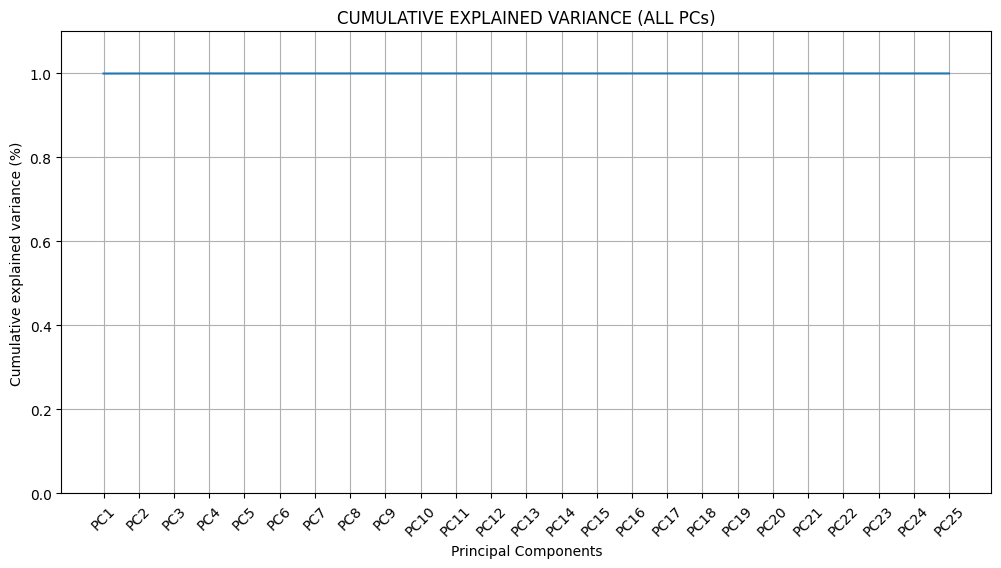

In [277]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(Xworkdf.values)
# eigenvalues = pca.explained_variance_
# explained_variances = eigenvalues / np.sum(eigenvalues)
# explained_variance_ratio = np.cumsum(explained_variances)
# plt.plot(explained_variance_ratio, marker='o')
# #plt.plot(explained_variances, marker='o')
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))  
plt.title('CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.xticks(ticks=np.arange(pca.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca.n_features_)],  
           rotation=45)
plt.ylim([0, 1.1])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


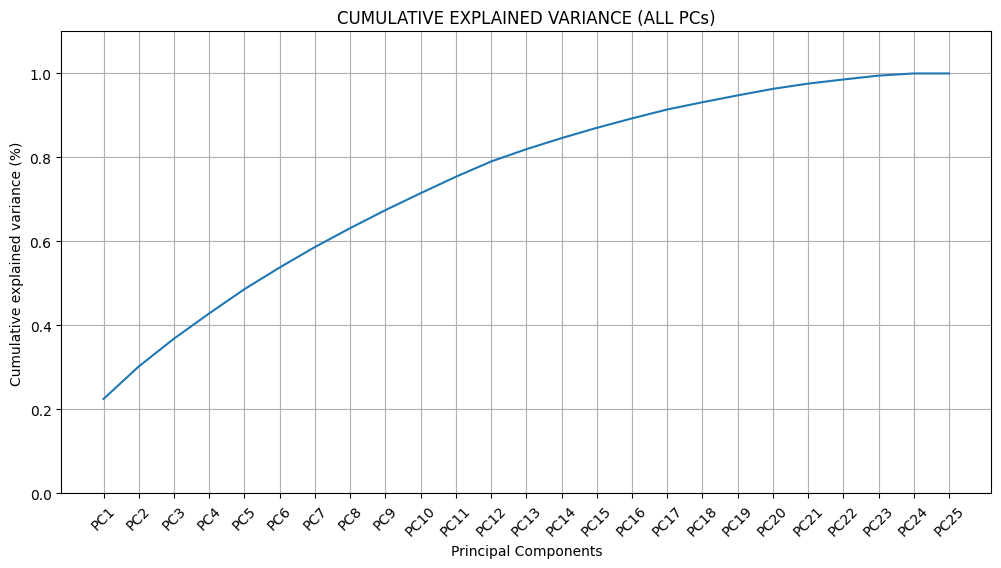

In [278]:
pca_std=PCA()
pca_std.fit_transform(Xworkdf_std.values)
# eigenvalues = pca_std.explained_variance_
# explained_variances = pca_std.explained_variance_
# plt.plot(np.cumsum(eigenvalues), marker='o') #cum
# plt.plot(explained_variances, marker='o') #individual

# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))  
plt.title('CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.xticks(ticks=np.arange(pca_std.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_std.n_features_in_)],  
           rotation=45)
plt.ylim([0, 1.1])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


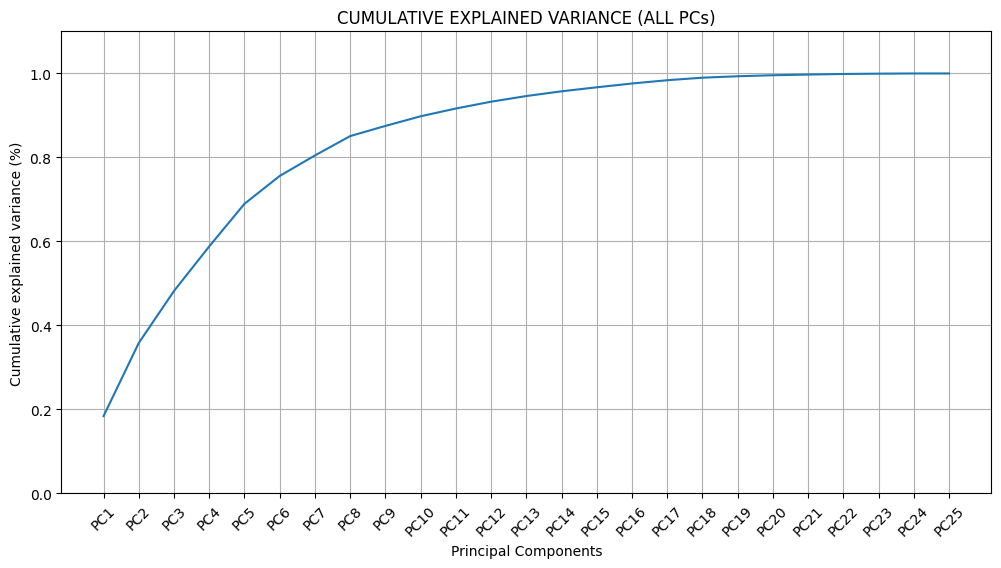

In [279]:
pca_mm=PCA()
pca_mm.fit_transform(Xworkdf_mm.values)
# eigenvalues = pca_mm.explained_variance_
# explained_variances = pca_mm.explained_variance_
# plt.plot(np.cumsum(eigenvalues), marker='o') #cum
# plt.plot(explained_variances, marker='o') #individual
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_))  
plt.title('CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.xticks(ticks=np.arange(pca_mm.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_mm.n_features_)],  
           rotation=45)
plt.ylim([0, 1.1])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()


Comparing the three graphs one can see that a Scaler is needed to reduce the dimensionality of the PCA. In the first graph, it is possible to see that no CP can capture the total variability of the data that is in fact spread over all components that make almost the same contribution, so dimensionality reduction is not possible. With the introduction of the scalers it is possible to see that in fact is reduction is also possible because the last CPs (Especially in the MinMaxScaler) give almost no contribution of the explained variances compared to the first components (consistent with the data that were obtained from the percentage change variable in the step before).

Exercise 4 (Dimensionality Reduction and Interpretation of the PCs)

In [280]:
m_one_std = np.sum(np.cumsum(pca_std.explained_variance_ratio_) < .33) + 1
m_one_mm = np.sum(np.cumsum(pca_mm.explained_variance_ratio_) < .33) + 1
m_std = min(m_one_std, 5)
m_mm = min(m_one_mm, 5)

pca_std=PCA(n_components = m_std)
pca_std.fit(Xworkdf_std.values)
Y_pca_std = pca_std.transform(Xworkdf_std.values)
pca_mm = PCA(n_components = m_mm)
pca_mm.fit(Xworkdf_mm.values)
Y_pca_mm = pca_mm.transform(Xworkdf_mm.values)

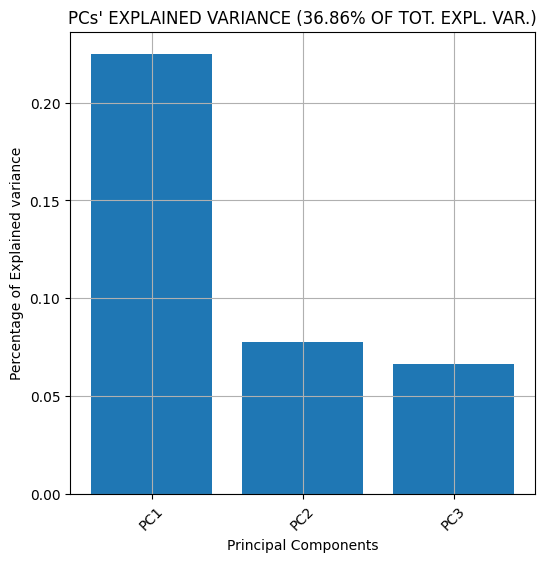

In [281]:
round_expl_var_ratio = np.round(pca_std.explained_variance_ratio_.sum()*100, decimals=2)  

# MAKE THE BARPLOT
plt.figure(figsize=(6, 6))
plt.bar(range(1, m_std+1), pca_std.explained_variance_ratio_)  
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1, m_std+1),  
           labels=[f'PC{i}' for i in range(1, m_std+1)],  
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

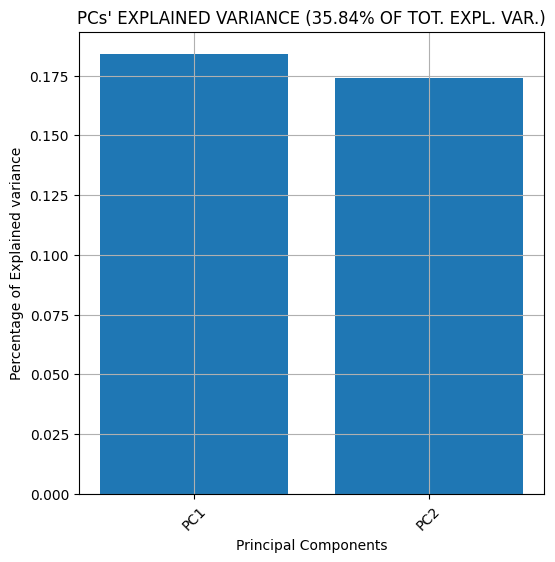

In [282]:
round_expl_var_ratio = np.round(pca_mm.explained_variance_ratio_.sum()*100, decimals=2)  

# MAKE THE BARPLOT
plt.figure(figsize=(6, 6))
plt.bar(range(1, m_mm+1), pca_mm.explained_variance_ratio_)  
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1, m_mm+1),  
           labels=[f'PC{i}' for i in range(1, m_mm+1)],  
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

These two bar graphs show that at least 33 percent of the total variance is made up of the top 3 PCs for StandardScaler (36.86 percent) and 2 for MinMaxScaler (35.84 percent). To understand which features contribute to the PCs and assign names to them, it is necessary to plot the contribution of features:

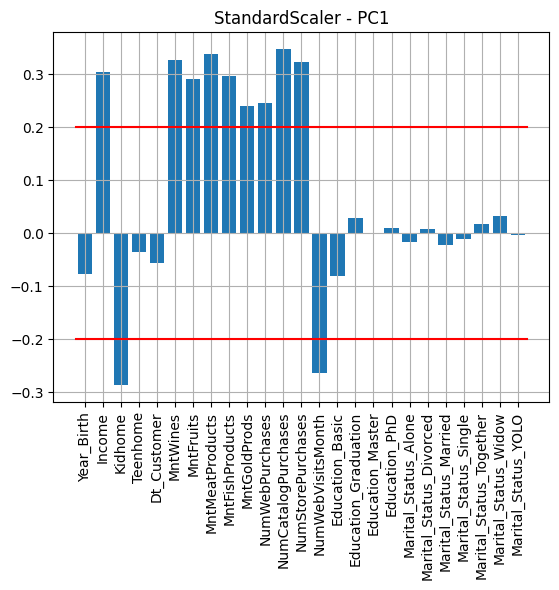

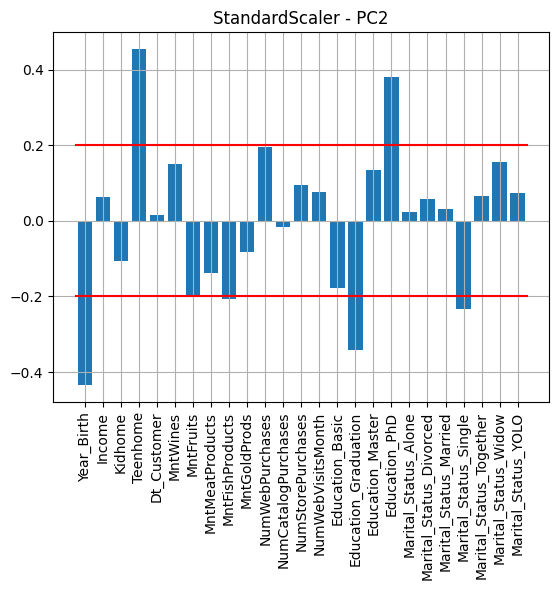

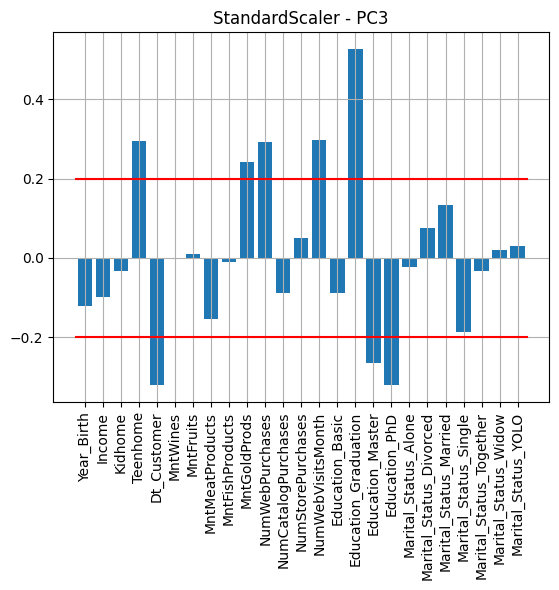

In [283]:
eps_std = np.sqrt(1/pca_std.n_features_in_)

#StandardScaler
for i in range(m_std):
    plt.figure()
    plt.bar(np.arange(pca_std.n_features_in_), pca_std.components_[i, :])
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [eps_std, eps_std], 'red')
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [-eps_std, -eps_std], 'red')
    plt.xticks(ticks=np.arange(pca_std.n_features_in_), 
            labels=Xworkdf_std.columns.to_list(),
            rotation='vertical')
    plt.title('StandardScaler - PC'+ str(i+1) )
    plt.grid()
plt.show()

From which the following characteristics can be derived:

PC1: People with higher income and more purchases(+) vs People with kids and who visit the website(-) (non so come chiamarlo) \
PC2: Older single graduates(-) vs PhD graduates with teenagers at home(+) \
PC3: People who are long time customers and have masters or PhD(-) vs Graduated people with kids and buy gold online (+)

Non so come sintetizzare questi nomi lol
and the following name:

In [284]:
pc_names_std = ['income(+) vs kids(-)', 
           'graduates(-) vs teenagers (+)',  
           'PhD(-) vs gold(+)'  
           ]

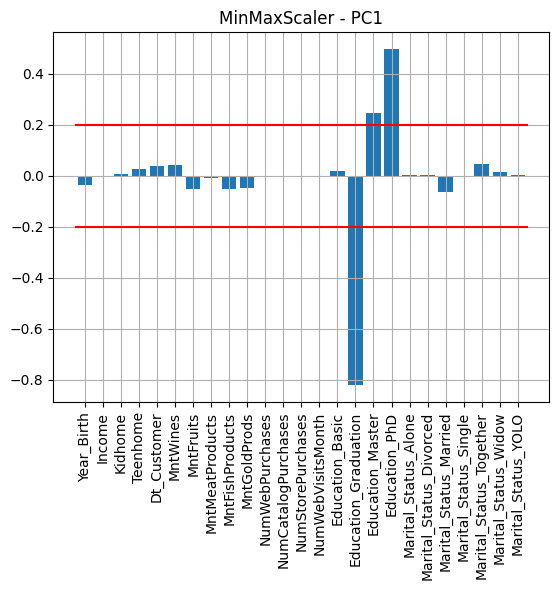

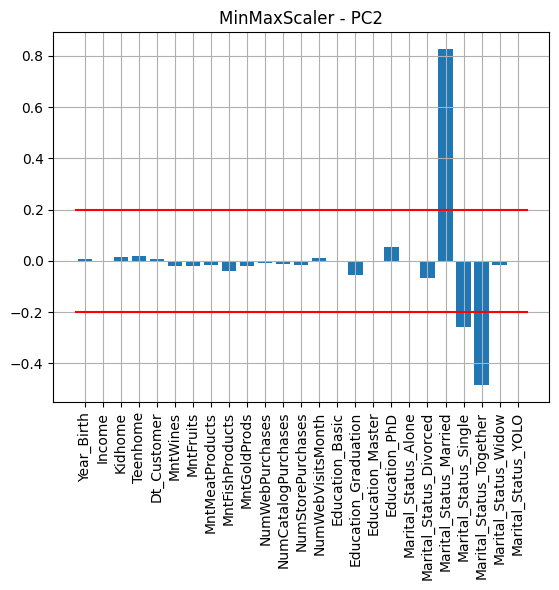

In [285]:
eps_mm = np.sqrt(1/pca_mm.n_features_in_)
#MinMaxScaler
for i in range(m_mm):
    plt.figure()
    plt.bar(np.arange(pca_mm.n_features_in_), pca_mm.components_[i, :])
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [eps_mm, eps_mm], 'red')
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [-eps_mm, -eps_mm], 'red')
    plt.xticks(ticks=np.arange(pca_mm.n_features_in_), 
            labels=Xworkdf_mm.columns.to_list(),
            rotation='vertical')
    plt.title('MinMaxScaler - PC'+ str(i+1) )
    plt.grid()
plt.show()

Instead, for MinMaxScaler :

PC1: Master or PhD (+) vs Graduated (-) \
PC2: Married People(+) vs Single or together(-)

In [286]:
pc_names_mm = ['Master or PhD (+) vs Graduated (-)', 
           'Married People(+) vs Single or together(-)'
           ]

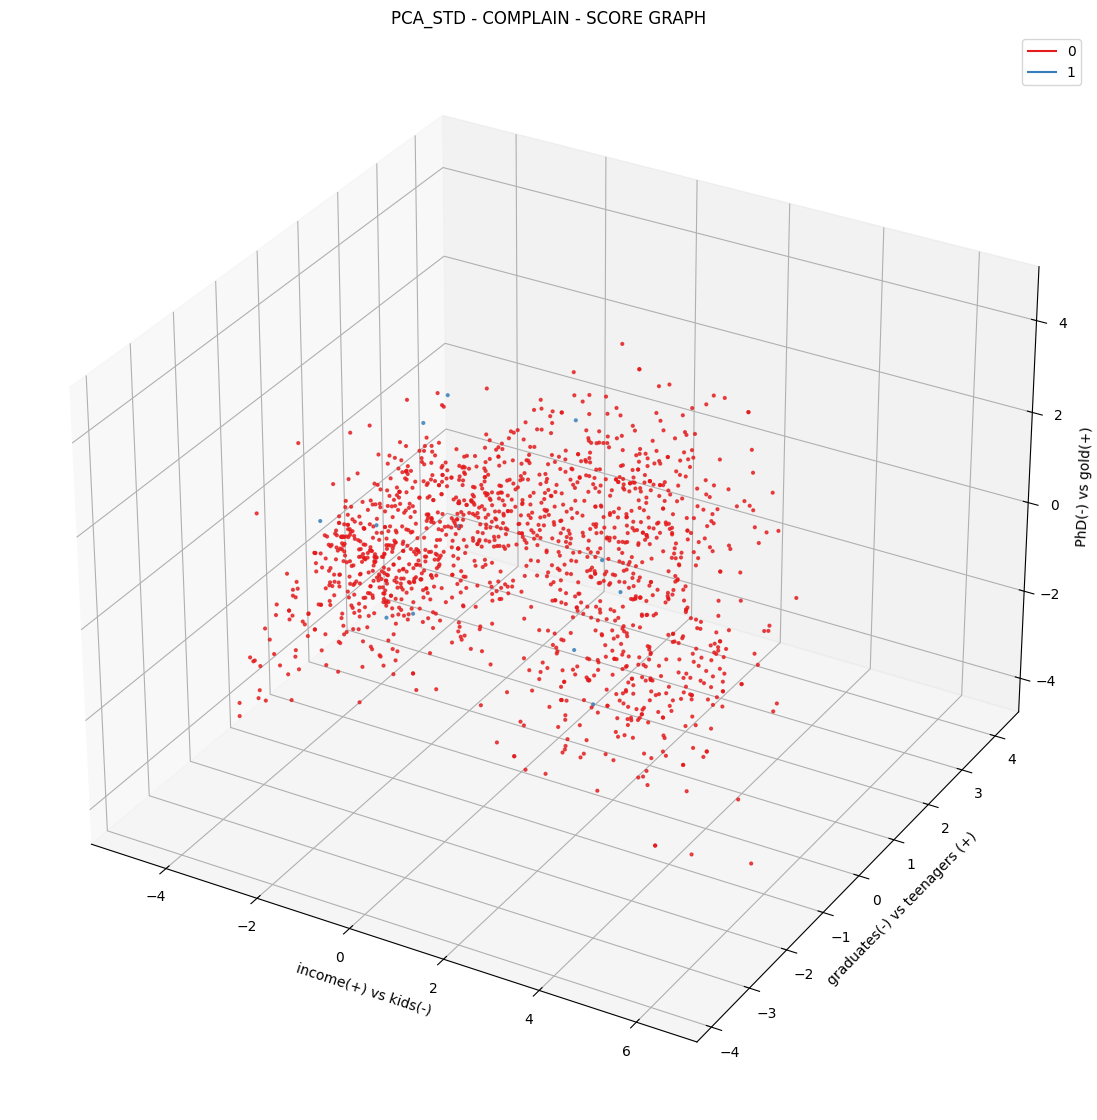

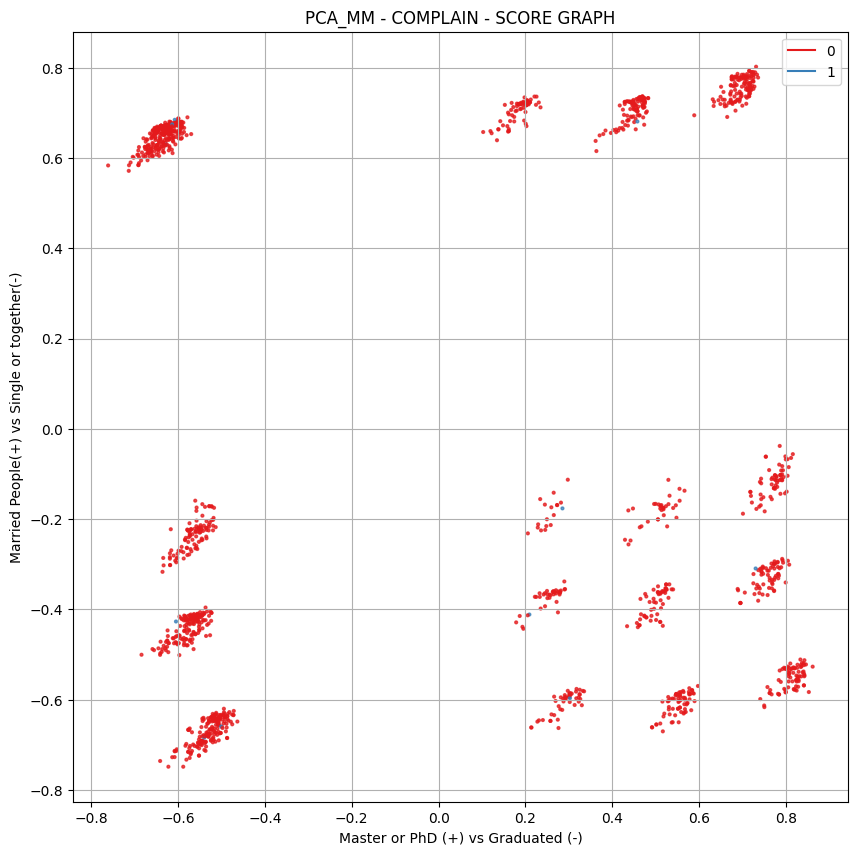

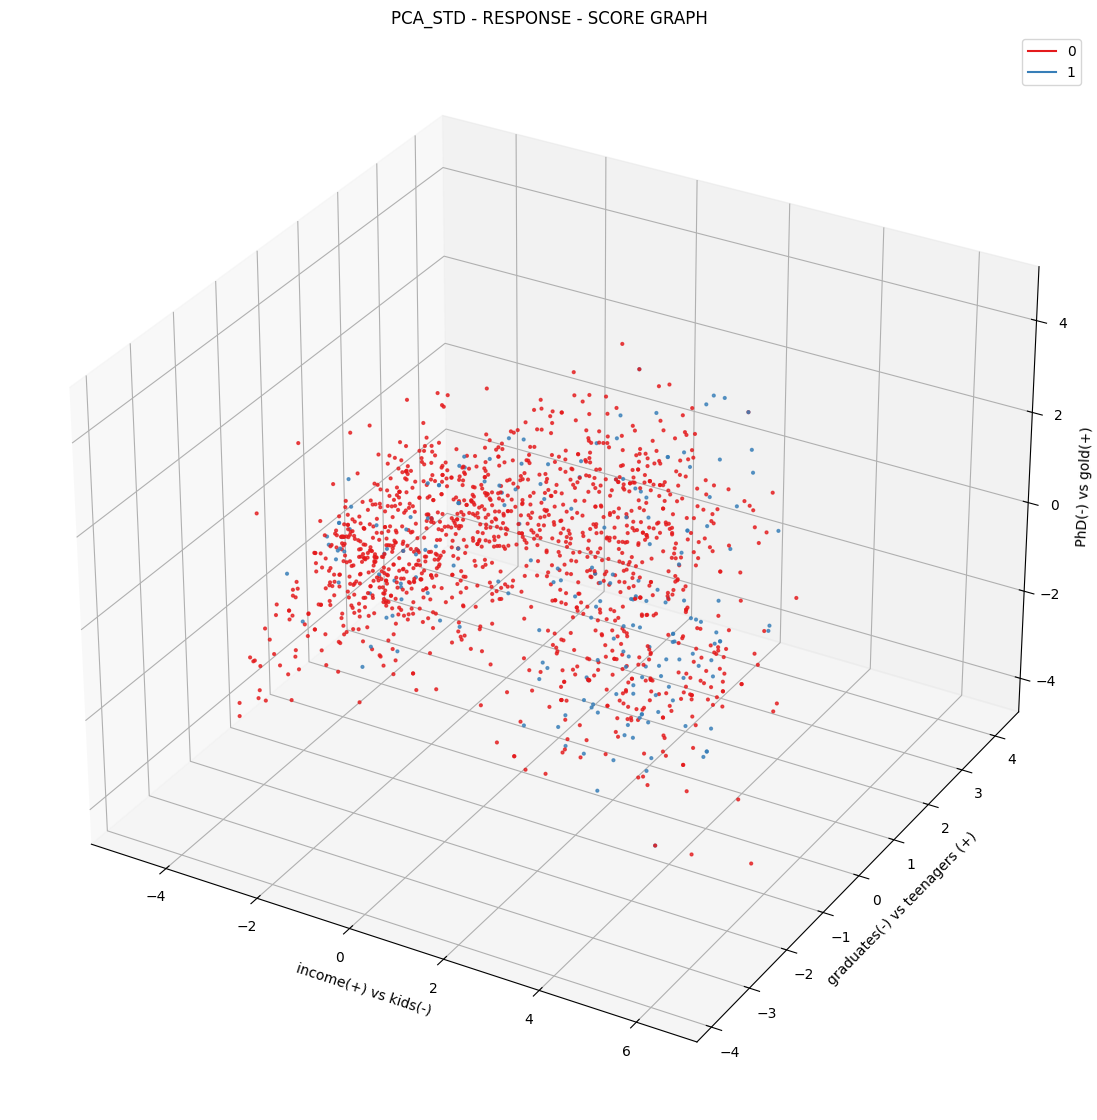

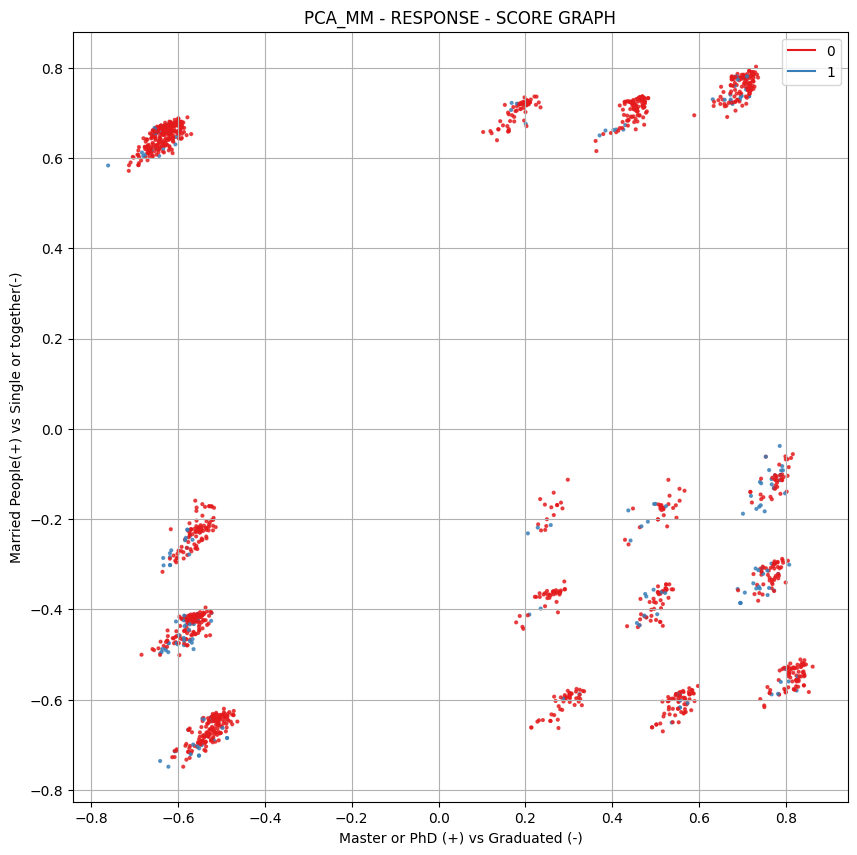

In [287]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D

set1 = cm.Set1.colors
# labels = workdf[['NumDealsPurchases', 'Response', 'Complain', 'Recency']].values

# label_Recency = workdf['Recency'].unique()
# print(label_Recency)
# label_NumDealsPurchases = workdf['NumDealsPurchases'].unique() # make binary condition purchases > 7 and two binary values in the legend
# print(label_NumDealsPurchases)
label_Complain = workdf['Complain'].unique()
label_Response = workdf['Response'].unique()

Complain_colors = {label_Complain[i]: set1[i] for i in range(len(label_Complain))}  

# ADDING THE 'color' COLUMN
workdf['Complain_color'] = [Complain_colors [t] for t in workdf['Complain'].values]  



# MAKE A CUSTOM LEGEND FOR COLORS
Complain_colors_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(14, 14))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y_pca_std[:, 0], Y_pca_std[:, 1], Y_pca_std[:, 2], s=4, c=workdf['Complain_color'].values, alpha=0.75)  
plt.title('PCA_STD - COMPLAIN - SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names_std[0])
ax_sg_3d.set_ylabel(pc_names_std[1])
ax_sg_3d.set_zlabel(pc_names_std[2])
plt.legend(Complain_colors_legend, [k for k in Complain_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(10, 10))
plt.scatter(Y_pca_mm[:, 0], Y_pca_mm[:, 1], s=4, c=workdf['Complain_color'].values, alpha=0.75)  
plt.title('PCA_MM - COMPLAIN - SCORE GRAPH')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.legend(Complain_colors_legend, [k for k in Complain_colors.keys()])
plt.grid()
plt.show()



Response_colors = {label_Response[i]: set1[i] for i in range(len(label_Response))}  

# ADDING THE 'color' COLUMN
workdf['Response_color'] = [Response_colors [t] for t in workdf['Response'].values]  



# MAKE A CUSTOM LEGEND FOR COLORS
Response_colors_legend = [Line2D([0], [0], color=Response_colors[k]) for k in Response_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(14, 14))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y_pca_std[:, 0], Y_pca_std[:, 1], Y_pca_std[:, 2], s=4, c=workdf['Response_color'].values, alpha=0.75)  
plt.title('PCA_STD - RESPONSE - SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names_std[0])
ax_sg_3d.set_ylabel(pc_names_std[1])
ax_sg_3d.set_zlabel(pc_names_std[2])
plt.legend(Response_colors_legend, [k for k in Response_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(10, 10))
plt.scatter(Y_pca_mm[:, 0], Y_pca_mm[:, 1], s=4, c=workdf['Response_color'].values, alpha=0.75)  
plt.title('PCA_MM - RESPONSE - SCORE GRAPH')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.legend(Response_colors_legend, [k for k in Response_colors.keys()])
plt.grid()
plt.show()



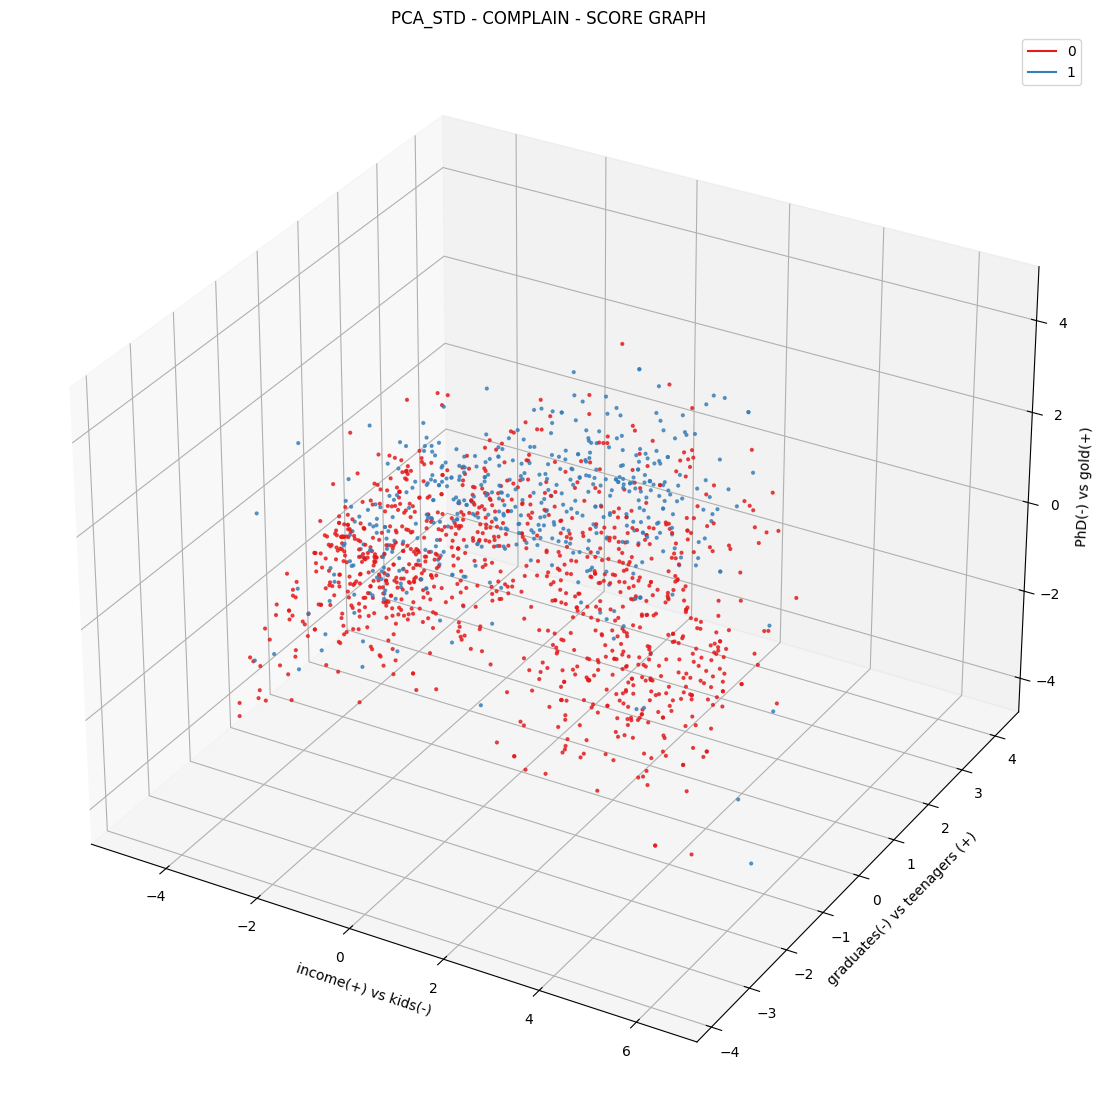

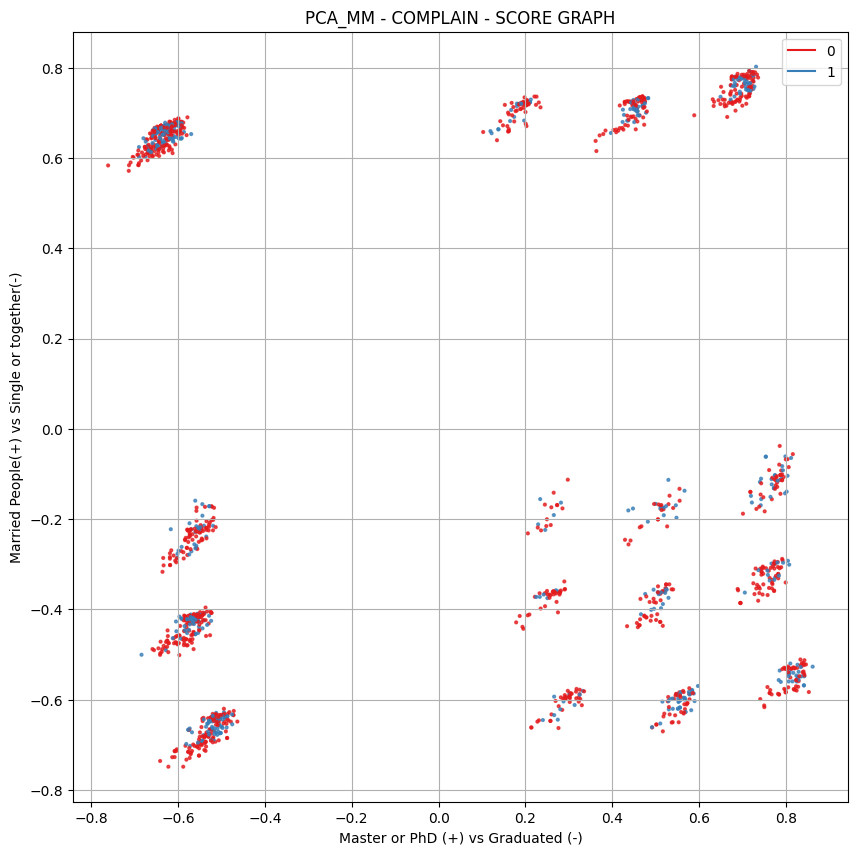

In [288]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D

set1 = cm.Set1.colors
media_colonna = workdf['NumDealsPurchases'].mean()
workdf['NumDealsPurchases'] = workdf['NumDealsPurchases'].apply(lambda x: 1 if x > media_colonna else 0)
label_Complain = workdf['NumDealsPurchases'].unique()

Complain_colors = {label_Complain[i]: set1[i] for i in range(len(label_Complain))}  

# ADDING THE 'color' COLUMN
workdf['NumDealsPurchases_color'] = [Complain_colors [t] for t in workdf['NumDealsPurchases'].values]  



# MAKE A CUSTOM LEGEND FOR COLORS
Complain_colors_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(14, 14))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y_pca_std[:, 0], Y_pca_std[:, 1], Y_pca_std[:, 2], s=4, c=workdf['NumDealsPurchases_color'].values, alpha=0.75)  
plt.title('PCA_STD - COMPLAIN - SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names_std[0])
ax_sg_3d.set_ylabel(pc_names_std[1])
ax_sg_3d.set_zlabel(pc_names_std[2])
plt.legend(Complain_colors_legend, [k for k in Complain_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(10, 10))
plt.scatter(Y_pca_mm[:, 0], Y_pca_mm[:, 1], s=4, c=workdf['NumDealsPurchases_color'].values, alpha=0.75)  
plt.title('PCA_MM - COMPLAIN - SCORE GRAPH')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.legend(Complain_colors_legend, [k for k in Complain_colors.keys()])
plt.grid()
plt.show()





In [289]:
#print(sum(workdf["AcceptedCmp1"]==1)+sum(workdf["AcceptedCmp2"]==1)+sum(workdf["AcceptedCmp3"]==1)+sum(workdf["AcceptedCmp4"]==1)+sum(workdf["AcceptedCmp5"]==1))
#print(sum(workdf[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]] == 0.all(axis=1)))
#print(sum((workdf[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]] == 0).all(axis=1)))
m1 = workdf["AcceptedCmp1"]==1
m2 = workdf["AcceptedCmp2"]==1
m3 = workdf["AcceptedCmp3"]==1
m4 = workdf["AcceptedCmp4"]==1
m5 = workdf["AcceptedCmp5"]==1
m0 = (workdf[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]] == 0).all(axis=1)
m12 = (workdf[["AcceptedCmp1", "AcceptedCmp2"]] == 1).all(axis=1)
print(sum(m1)+sum(m2)+sum(m3)+sum(m4)+sum(m5))
print(sum(m12), sum(m1), sum(m2))
display(workdf.loc[m12])
print(len(workdf))


436
8 82 19


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Complain_color,Response_color,NumDealsPurchases_color
1710,1986,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,61,...,1,0,1,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.8941176470588236, 0.10196078431372549, 0.10..."
417,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,26,...,0,1,1,1,1,0,0,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.8941176470588236, 0.10196078431372549, 0.10...","(0.8941176470588236, 0.10196078431372549, 0.10..."
575,1977,PhD,Married,61996.0,0,1,2013-01-31,27,1050,12,...,0,1,0,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.21568627450980393, 0.49411764705882355, 0.7..."
430,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,16,...,0,1,1,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.8941176470588236, 0.10196078431372549, 0.10..."
824,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,...,0,1,1,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.8941176470588236, 0.10196078431372549, 0.10..."
252,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,148,...,0,1,1,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.8941176470588236, 0.10196078431372549, 0.10..."
559,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,...,0,1,1,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.8941176470588236, 0.10196078431372549, 0.10..."
1308,1982,Graduation,Married,65169.0,0,0,2014-01-14,23,1074,0,...,1,0,1,1,1,0,1,"(0.8941176470588236, 0.10196078431372549, 0.10...","(0.21568627450980393, 0.49411764705882355, 0.7...","(0.8941176470588236, 0.10196078431372549, 0.10..."


1478


0


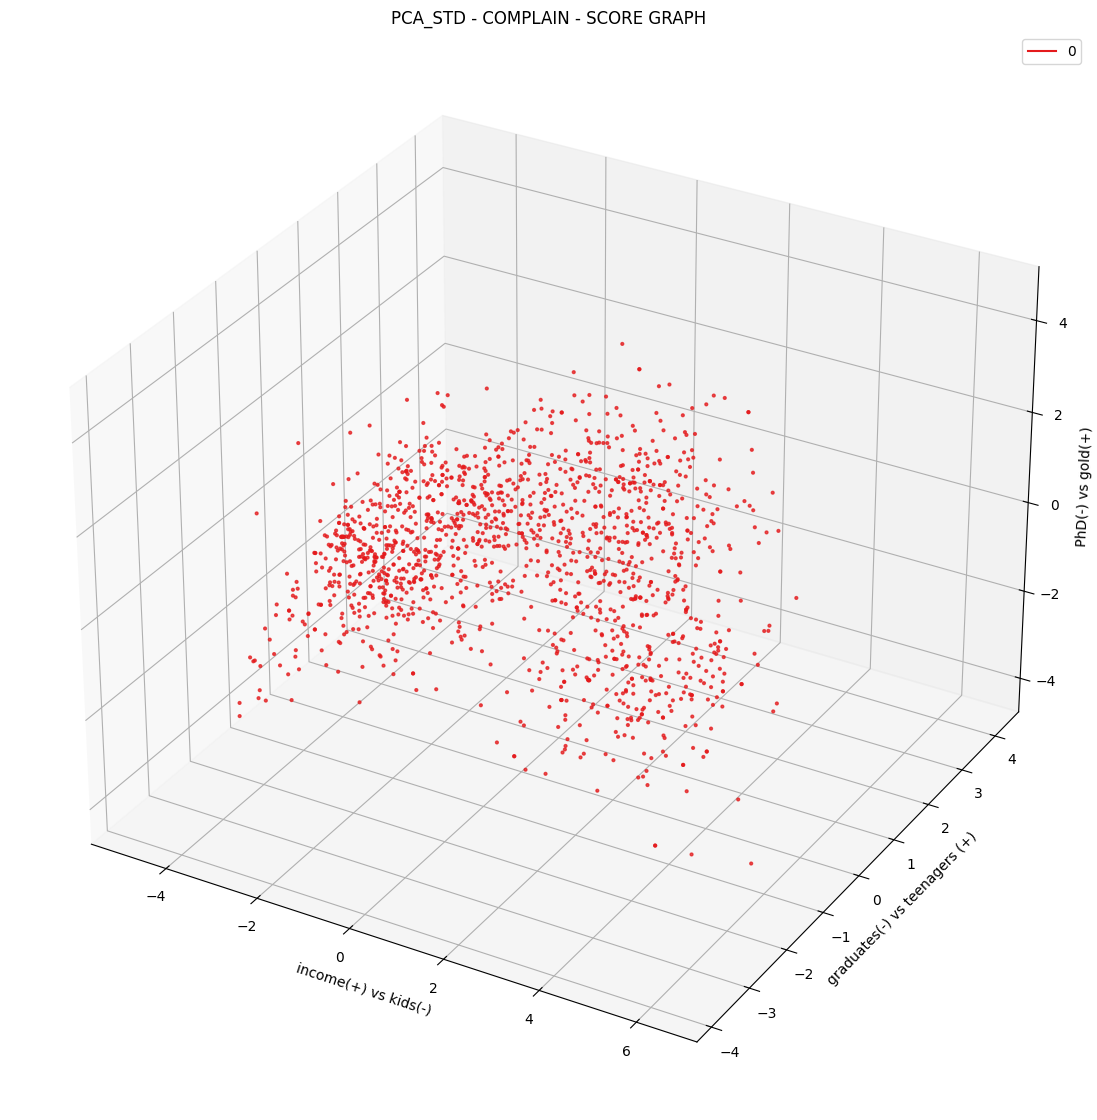

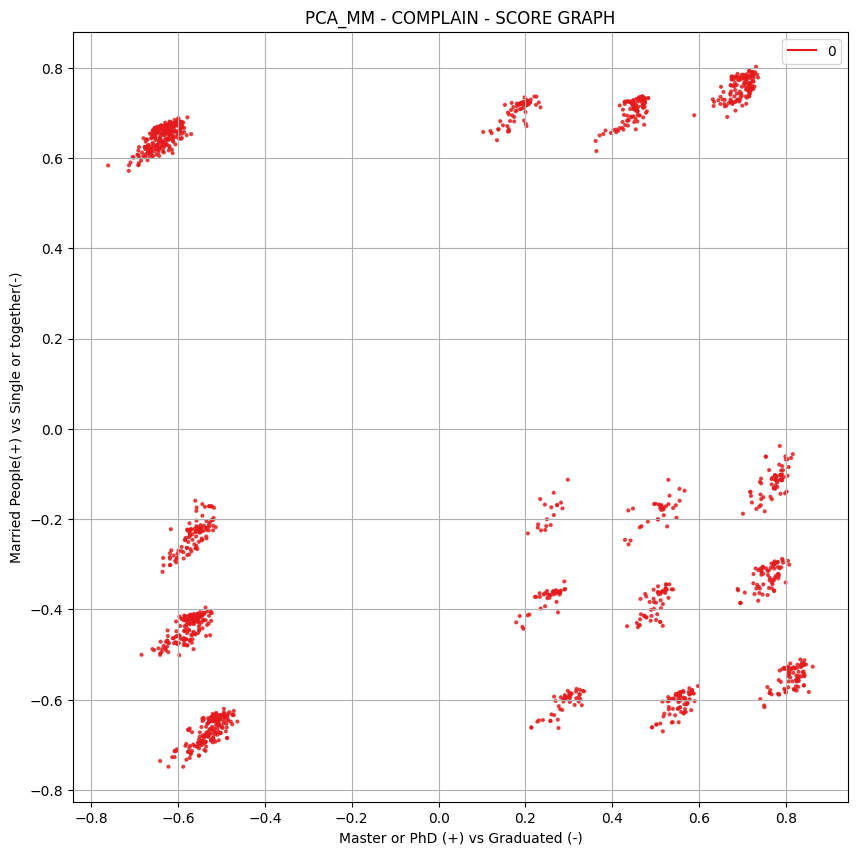

In [290]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D

#workdf['target'] = np.argmax(workdf[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].values, axis=1)
for e in m1 :
    if(e==True):
        workdf['target']=1
    else:
        workdf['target']=0
print(sum(workdf['target']))
label_Complain = workdf['target'].unique()

set1 = cm.Set1.colors

Complain_colors = {label_Complain[i]: set1[i] for i in range(len(label_Complain))}  

# ADDING THE 'color' COLUMN
workdf['comp_color'] = [Complain_colors [t] for t in workdf['target'].values]  

# MAKE A CUSTOM LEGEND FOR COLORS
Complain_colors_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(14, 14))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y_pca_std[:, 0], Y_pca_std[:, 1], Y_pca_std[:, 2], s=4, c=workdf['comp_color'].values, alpha=0.75)  
plt.title('PCA_STD - COMPLAIN - SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names_std[0])
ax_sg_3d.set_ylabel(pc_names_std[1])
ax_sg_3d.set_zlabel(pc_names_std[2])
plt.legend(Complain_colors_legend, [k for k in Complain_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(10, 10))
plt.scatter(Y_pca_mm[:, 0], Y_pca_mm[:, 1], s=4, c=workdf['comp_color'].values, alpha=0.75)  
plt.title('PCA_MM - COMPLAIN - SCORE GRAPH')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.legend(Complain_colors_legend, [k for k in Complain_colors.keys()])
plt.grid()
plt.show()



Exercise 5 (k-Means)

In [291]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(rs)
sil_coeff_max_std=0
for n_cluster in range(3, 11):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=rs).fit(Y_pca_std)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y_pca_std, label, metric='euclidean')
    if(sil_coeff > sil_coeff_max_std) : 
        sil_coeff_max_std = sil_coeff
        k_std = n_cluster 
    # n_clusters=3 is the best value for Y_pca_std
print("Best k for Silhouette Coefficent for std is " + str(k_std))
sil_coeff_max_mm=0
for n_cluster in range(3, 11):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=rs).fit(Y_pca_mm)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y_pca_mm, label, metric='euclidean')
    if(sil_coeff > sil_coeff_max_mm) : 
        sil_coeff_max_mm = sil_coeff
        k_mm = n_cluster 
    # n_clusters=4 is the best value for Y_pca_std
print("Best k for Silhouette Coefficent for mm is " +str(k_mm))


Best k for Silhouette Coefficent for std is 3
Best k for Silhouette Coefficent for mm is 4


In [292]:
km_std = KMeans(n_clusters=3, n_init=10, random_state=rs)
km_mm = KMeans(n_clusters=4, n_init=10, random_state=rs)

Y_km_std = km_std.fit_transform(Y_pca_std)
Y_km_mm = km_mm.fit_transform(Y_pca_mm)

Exercise 6 (Clusters and Centroid Interpretation and Visualization)

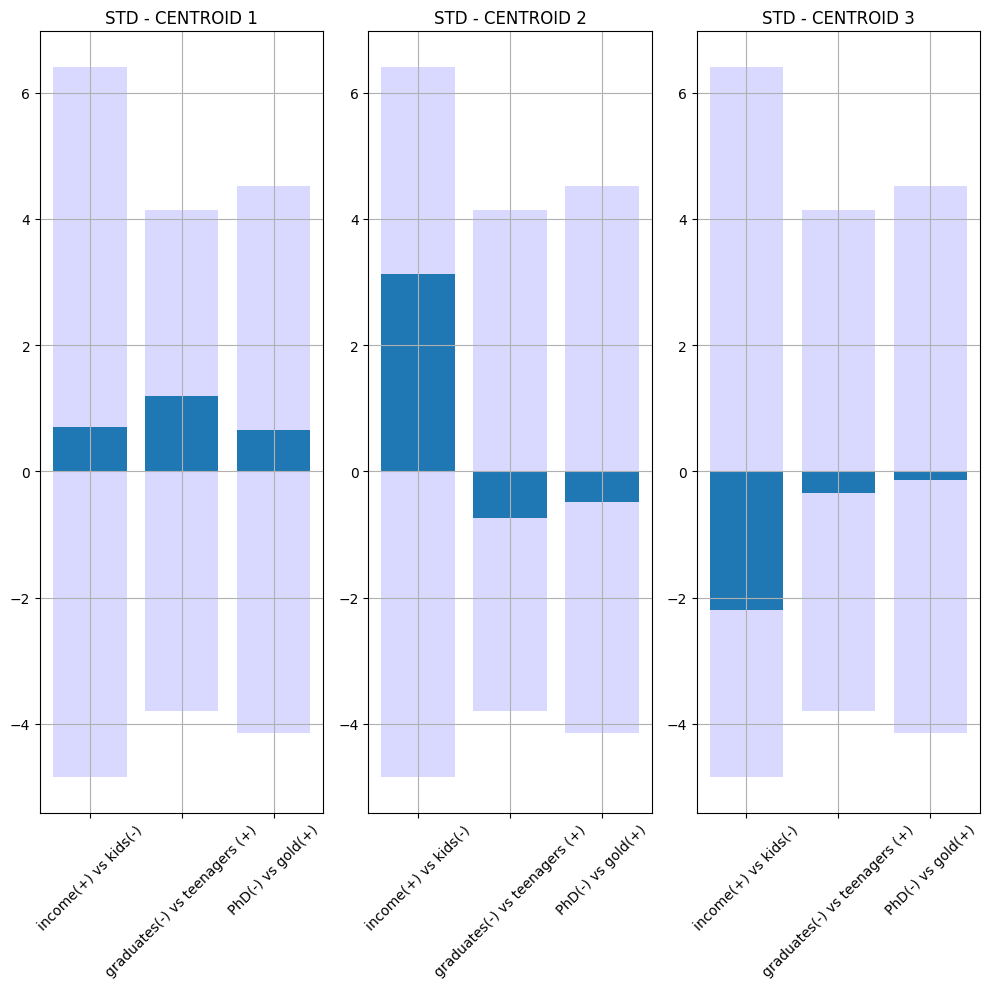

In [293]:
# COMPUTE THE MAX/MIN VALUES IN THE PC-SPACE
maxs_y = Y_pca_std.max(axis=0)  
mins_y = Y_pca_std.min(axis=0)   

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(1, 3, figsize=(10, 10))
for ii in range(k_std):
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])  
    ax_centroids[ii].set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))  
    ax_centroids[ii].set_xticklabels(labels=pc_names_std, rotation=45)  
    ax_centroids[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids[ii].set_title(f'STD - CENTROID {ii+1}')

From the barplot we can see that:
    Centroid 1: who has positive income, teenages in the household and spent on old, so we can call them : gold pioneer fathers
    Centroid 2: who has positive income, no graduates or PhD education : lucky in business
    Centroid 3:  who has no grateful income, no graduates or PhD education : unlucky in business

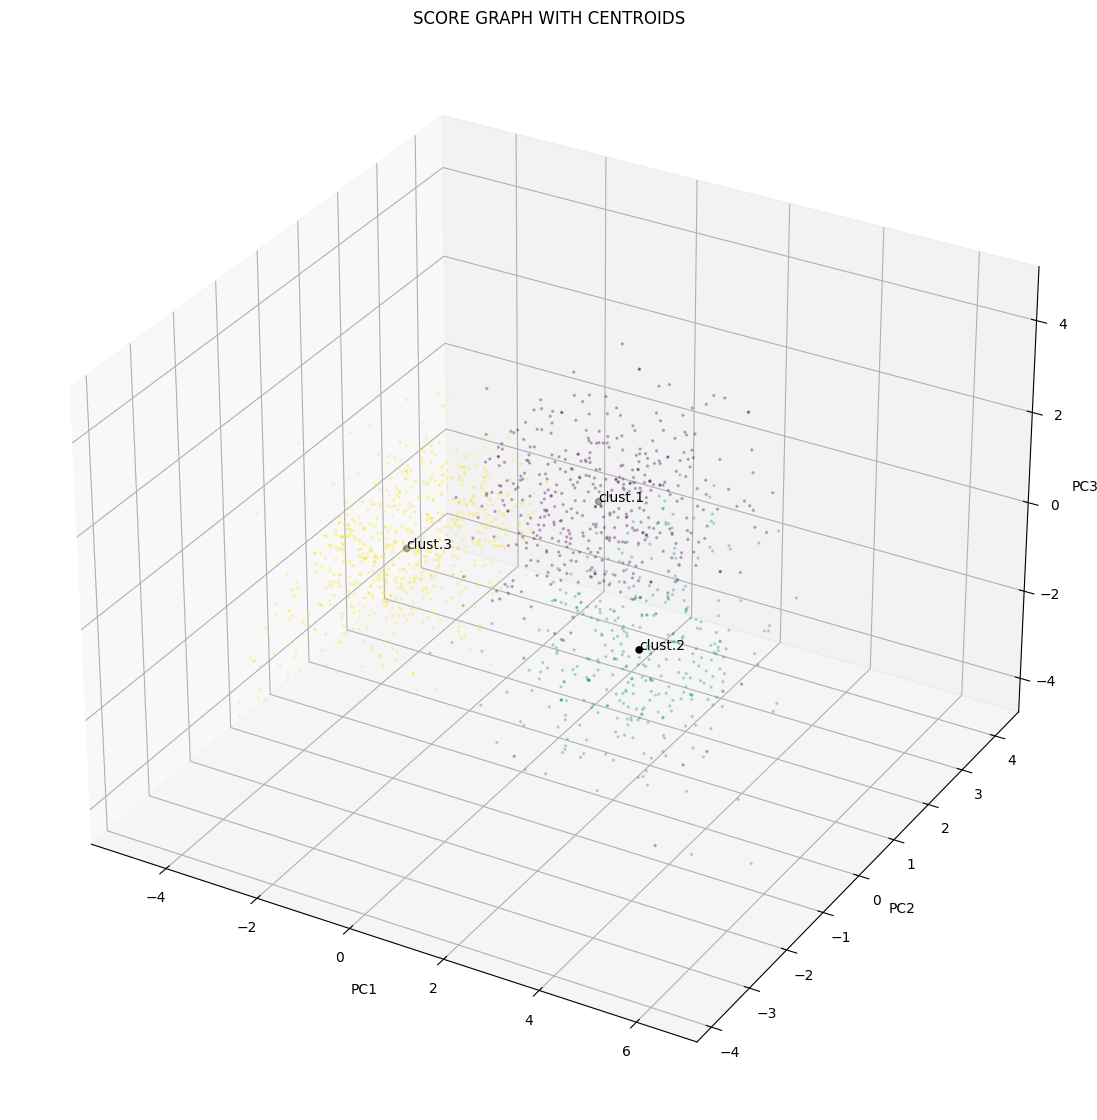

In [294]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km = plt.figure(figsize=(14, 14))
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection='3d')
labels = km_std.labels_
ax_sg_3d_km.scatter(Y_pca_std[:,0], Y_pca_std[:,1], Y_pca_std[:,2] , c=labels, s=2, alpha=0.25)
ax_sg_3d_km.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black')
for kk in range(k_std):
    ax_sg_3d_km.text(km_std.cluster_centers_[kk, 0], km_std.cluster_centers_[kk, 1], km_std.cluster_centers_[kk, 2], f'clust.{kk+1}')
plt.title('SCORE GRAPH WITH CENTROIDS')
ax_sg_3d_km.set_xlabel("PC1")
ax_sg_3d_km.set_ylabel("PC2")
ax_sg_3d_km.set_zlabel("PC3")
plt.grid()
plt.show()

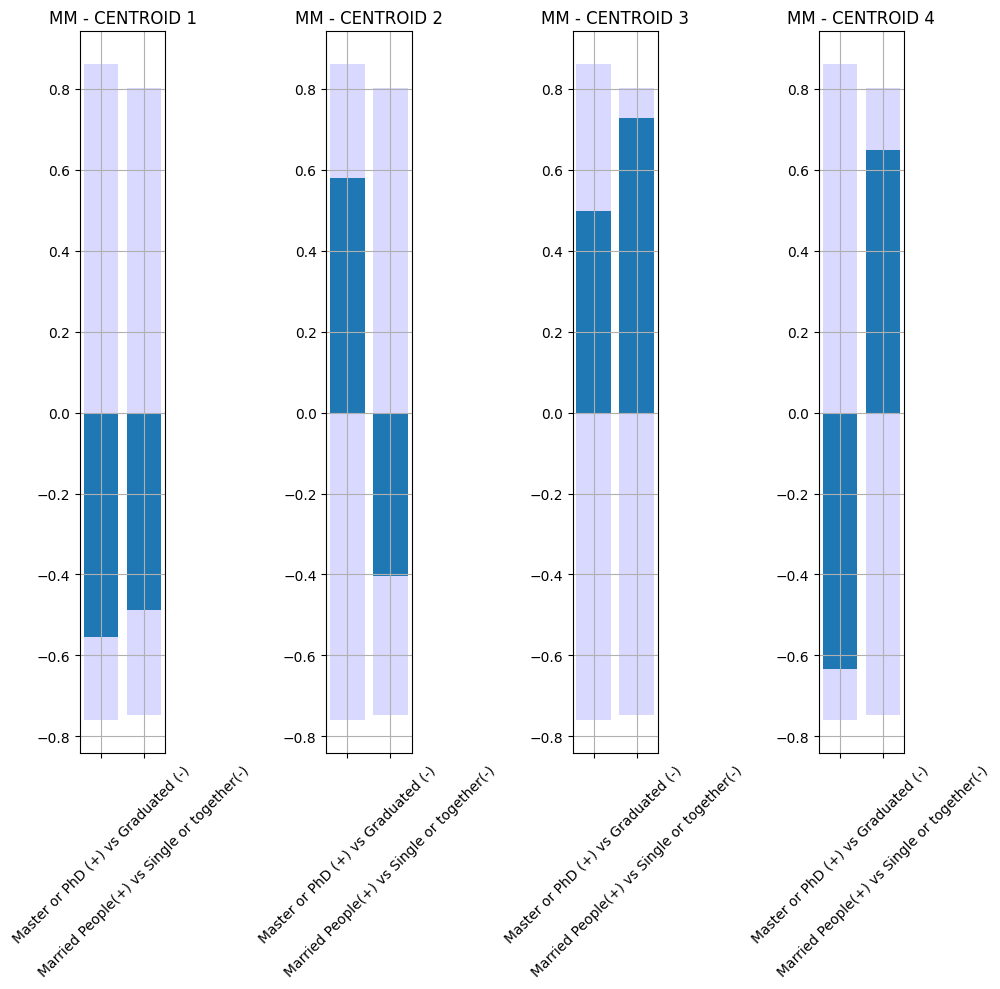

In [295]:
# COMPUTE THE MAX/MIN VALUES IN THE PC-SPACE
maxs_y = Y_pca_mm.max(axis=0)  
mins_y = Y_pca_mm.min(axis=0)   

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(1, 4, figsize=(10, 10))
for ii in range(k_mm):
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii, :])  
    ax_centroids[ii].set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))  
    ax_centroids[ii].set_xticklabels(labels=pc_names_mm, rotation=45)  
    ax_centroids[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids[ii].set_title(f'MM - CENTROID {ii+1}')

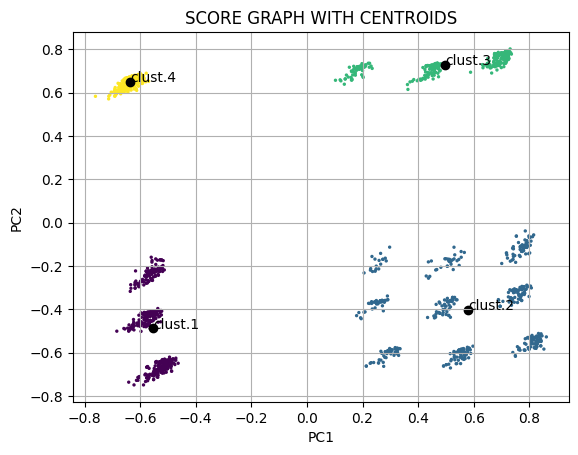

In [296]:
labels = km_mm.labels_
plt.scatter(Y_pca_mm[:,0], Y_pca_mm[:,1], c=labels, s=2)
plt.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black')
for kk in range(k_mm):
    plt.text(km_mm.cluster_centers_[kk, 0], km_mm.cluster_centers_[kk, 1], f'clust.{kk+1}')
plt.title('SCORE GRAPH WITH CENTROIDS')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

Comment

Exercise 7 - Clusters and Centroids Evaluation: For both the DFs, perform an internal
and an external evaluation of the clusterings obtained.

External evaluation

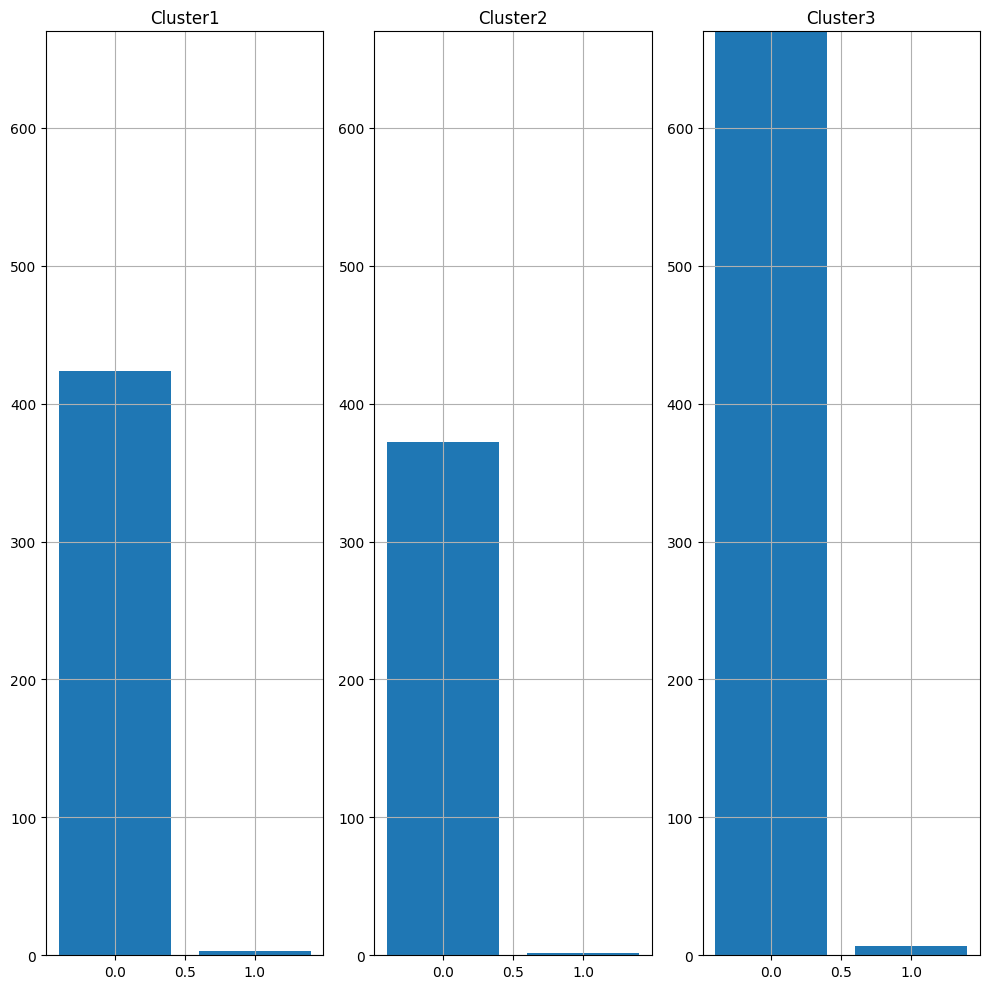

In [297]:
# Label:Complain su STD
mask_clusters = [km_std.labels_ == ii for ii in range(k_std)]
cluster_Complain = [dict(workdf.loc[mask_clusters[ii], 'Complain'].value_counts()) for ii in range(k_std)]
bin_labels = [0, 1]
maxcount = np.max([max(cluster_Complain[kk].values()) for kk in range(k_std)])

# MAKE THE BARPLOTS FOR THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(1, 3, figsize=(10,10))
for ii in range(k_std):
    ax_centroids_ext[ii].bar(bin_labels, [cluster_Complain[ii].get(bb, 0) for bb in bin_labels])
    ax_centroids_ext[ii].set_ylim(0, maxcount)
    ax_centroids_ext[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids_ext[ii].set_title(f'Cluster{ii + 1}')

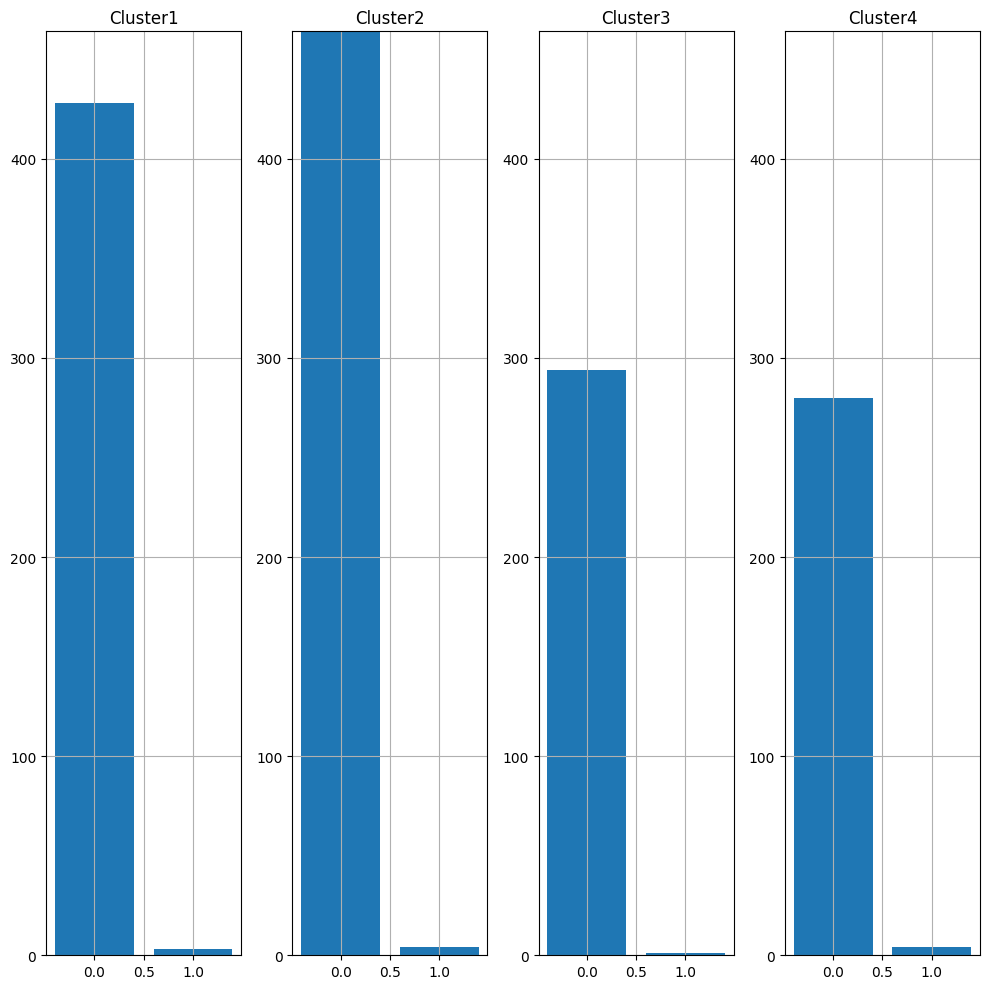

In [298]:
# Label:Complain su MM
mask_clusters = [km_mm.labels_ == ii for ii in range(k_mm)]
cluster_Complain = [dict(workdf.loc[mask_clusters[ii], 'Complain'].value_counts()) for ii in range(k_mm)]
bin_labels = [0, 1]
maxcount = np.max([max(cluster_Complain[kk].values()) for kk in range(k_mm)])

# MAKE THE BARPLOTS FOR THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(1, 4, figsize=(10,10))
for ii in range(k_mm):
    ax_centroids_ext[ii].bar(bin_labels, [cluster_Complain[ii].get(bb, 0) for bb in bin_labels])
    ax_centroids_ext[ii].set_ylim(0, maxcount)
    ax_centroids_ext[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids_ext[ii].set_title(f'Cluster{ii + 1}')

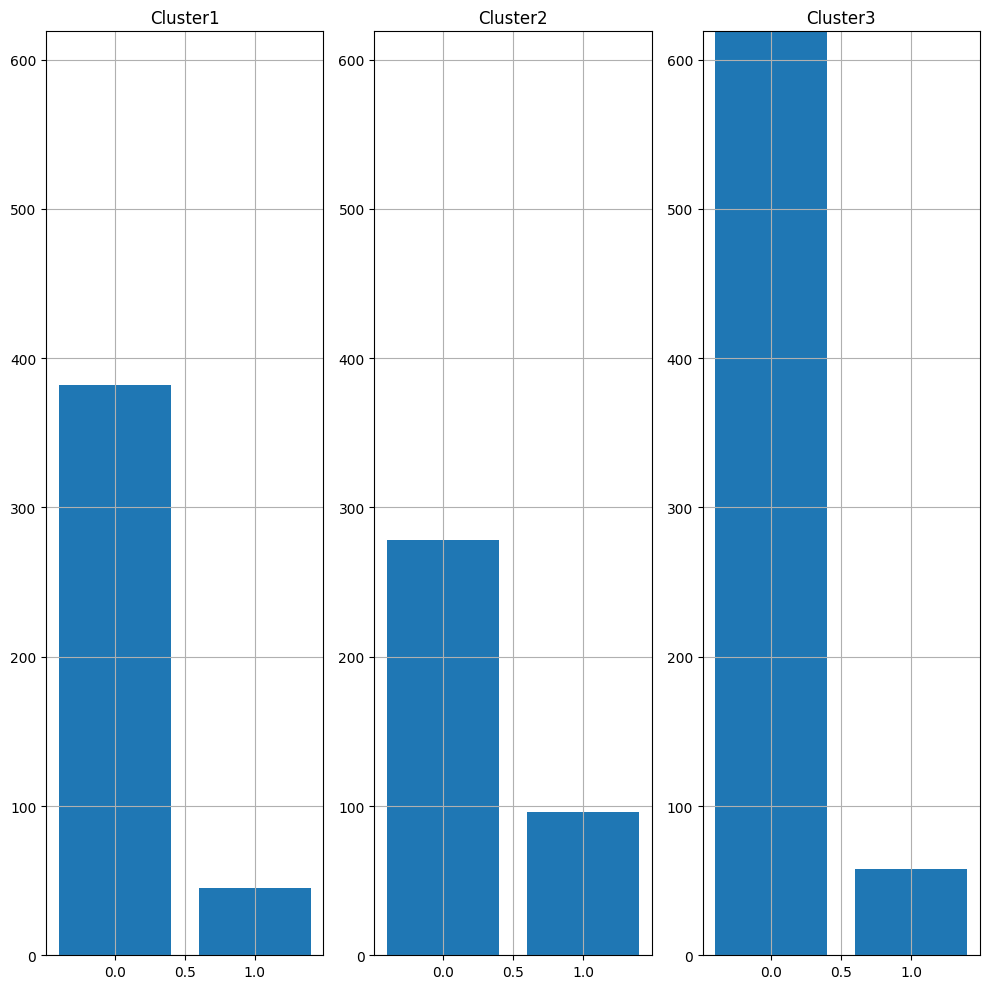

In [299]:
# Label:Response su STD
mask_clusters = [km_std.labels_ == ii for ii in range(k_std)]
cluster_Response = [dict(workdf.loc[mask_clusters[ii], 'Response'].value_counts()) for ii in range(k_std)]
bin_labels = [0, 1]
maxcount = np.max([max(cluster_Response[kk].values()) for kk in range(k_std)])

# MAKE THE BARPLOTS FOR THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(1, 3, figsize=(10,10))
for ii in range(k_std):
    ax_centroids_ext[ii].bar(bin_labels, [cluster_Response[ii].get(bb, 0) for bb in bin_labels])
    ax_centroids_ext[ii].set_ylim(0, maxcount)
    ax_centroids_ext[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids_ext[ii].set_title(f'Cluster{ii + 1}')

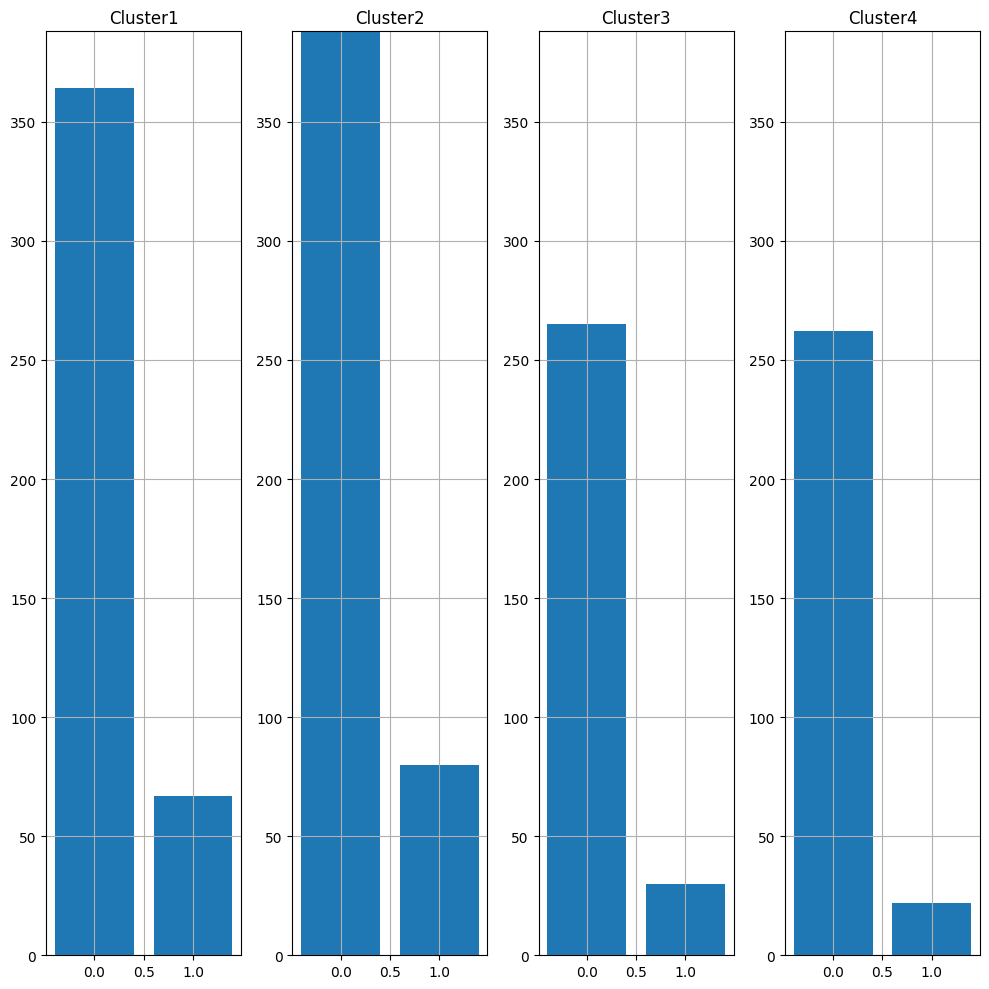

In [300]:
# Label:Response su MM
mask_clusters = [km_mm.labels_ == ii for ii in range(k_mm)]
cluster_Response = [dict(workdf.loc[mask_clusters[ii], 'Response'].value_counts()) for ii in range(k_mm)]
bin_labels = [0, 1]
maxcount = np.max([max(cluster_Response[kk].values()) for kk in range(k_mm)])

# MAKE THE BARPLOTS FOR THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(1, 4, figsize=(10,10))
for ii in range(k_mm):
    ax_centroids_ext[ii].bar(bin_labels, [cluster_Response[ii].get(bb, 0) for bb in bin_labels])
    ax_centroids_ext[ii].set_ylim(0, maxcount)
    ax_centroids_ext[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids_ext[ii].set_title(f'Cluster{ii + 1}')

Internal evaluation

In [301]:
from sklearn.metrics import silhouette_score, silhouette_samples

cluster_names = ["name1", "name2", "name3"]
best_silcoeff = silhouette_score(Y_pca_std, km_std.labels_)
silscores = silhouette_samples(Y_pca_std, km_std.labels_)
cluster_silscores = [np.mean(silscores[km_std.labels_ == kk]) for kk in range(k_std)]
display(pd.DataFrame(np.array(cluster_silscores + [sil_coeff_max_std]), index=cluster_names + ['Global'], columns=['Sil.Score-STD']))

cluster_names = ["name1", "name2", "name3","name4"]
best_silcoeff = silhouette_score(Y_pca_mm, km_mm.labels_)
silscores = silhouette_samples(Y_pca_mm, km_mm.labels_)
cluster_silscores = [np.mean(silscores[km_mm.labels_ == kk]) for kk in range(k_mm)]
display(pd.DataFrame(np.array(cluster_silscores + [sil_coeff_max_mm]), index=cluster_names + ['Global'], columns=['Sil.Score-STD']))

,Sil.Score-STD
name1,0.248240
name2,0.331726
name3,0.431082
Global,0.353117


,Sil.Score-STD
name1,0.801941
name2,0.659147
name3,0.770325
name4,0.959816
Global,0.780752
